# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Build partial query URL
query_url = "http://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Create lists for columns
clouds = []
country = []
dt = []
humidity = []
lat = []
lon= []
temp_max = []
speed = []
# Record counter
record_count = 0

print("Beginning Data Retrieval")
print("-------------------------") 

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url.format(city, api_key)).json()

    try:
        print(f"Processing Record {record_count} | {city}")
        
        # Add data to lists
        
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])

        # Count records
        record_count = record_count + 1
    except:
        print('City not found..Skipping.')

Beginning Data Retrieval
-------------------------
Processing Record 0 | cockburn town
Processing Record 1 | tondi
Processing Record 2 | san carlos de bariloche
Processing Record 3 | dikson
Processing Record 4 | pakxan
Processing Record 5 | victoria
Processing Record 6 | kapaa
Processing Record 7 | gravelbourg
Processing Record 8 | bowen
Processing Record 9 | barrow
Processing Record 10 | faanui
Processing Record 11 | tigil
Processing Record 12 | yashkul
Processing Record 13 | albany
Processing Record 14 | cap malheureux
Processing Record 15 | ushuaia
Processing Record 16 | longyearbyen
Processing Record 17 | klaksvik
Processing Record 18 | sentyabrskiy
City not found..Skipping.
Processing Record 18 | ustka
Processing Record 19 | rikitea
Processing Record 20 | port elizabeth
Processing Record 21 | ust-tsilma
Processing Record 22 | puerto ayora
Processing Record 23 | taolanaro
City not found..Skipping.
Processing Record 23 | airai
Processing Record 24 | attawapiskat
City not found..Skip

Processing Record 217 | lufkin
Processing Record 218 | kathmandu
Processing Record 219 | madimba
Processing Record 220 | singkang
Processing Record 221 | bengkulu
City not found..Skipping.
Processing Record 221 | arman
Processing Record 222 | jahrom
City not found..Skipping.
Processing Record 222 | huarmey
Processing Record 223 | slubice
Processing Record 224 | sao joao da barra
Processing Record 225 | meulaboh
Processing Record 226 | saint-augustin
Processing Record 227 | viedma
Processing Record 228 | marsaxlokk
Processing Record 229 | baturaja
Processing Record 230 | nanakuli
Processing Record 231 | skiros
City not found..Skipping.
Processing Record 231 | sorong
Processing Record 232 | nanpiao
Processing Record 233 | marystown
Processing Record 234 | domoni
City not found..Skipping.
Processing Record 234 | adrar
Processing Record 235 | shingu
Processing Record 236 | gravdal
Processing Record 237 | doctor pedro p. pena
City not found..Skipping.
Processing Record 237 | lagoa
Processin

Processing Record 432 | kolhapur
Processing Record 433 | louisbourg
City not found..Skipping.
Processing Record 433 | jiaozhou
Processing Record 434 | gamba
Processing Record 435 | caravelas
Processing Record 436 | manpur
Processing Record 437 | teruel
Processing Record 438 | tanete
Processing Record 439 | vila franca do campo
Processing Record 440 | hunza
City not found..Skipping.
Processing Record 440 | hobyo
Processing Record 441 | jumla
Processing Record 442 | iwanai
Processing Record 443 | kayerkan
Processing Record 444 | ituni
City not found..Skipping.
Processing Record 444 | vao
Processing Record 445 | los llanos de aridane
Processing Record 446 | garden city
Processing Record 447 | chumphon
Processing Record 448 | kuche
City not found..Skipping.
Processing Record 448 | manicore
Processing Record 449 | muros
Processing Record 450 | saqqez
Processing Record 451 | frunzivka
Processing Record 452 | sao miguel do araguaia
Processing Record 453 | ketchikan
Processing Record 454 | sko

In [71]:
# Create data frame
cities_df = pd.DataFrame({"City": city, "Cloudiness": clouds, "Country": country, "Date": dt, 
                              "Humidity": humidity, "Lat": lat, "Lng": lon, "Max Temp": temp_max, 
                             "Wind Speed": speed})
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gorizia,0,TC,1554358649,99,21.46,-71.14,298.849,8.22
1,gorizia,0,NG,1554358826,68,10.88,4.75,295.649,1.52
2,gorizia,75,AR,1554354000,87,-41.13,-71.31,280.150,5.10
3,gorizia,88,RU,1554358646,100,73.51,80.55,268.099,8.07
4,gorizia,64,LA,1554358827,84,18.39,103.66,299.449,1.07


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
cities_df.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [73]:
cities_df.to_csv('City_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

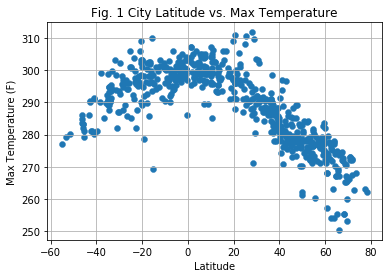

In [62]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", linewidth=0.4)

# Incorporate the other graph properties
plt.title("Fig. 1 City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_Max_temp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

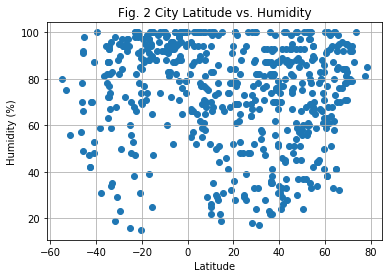

In [61]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Fig. 2 City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

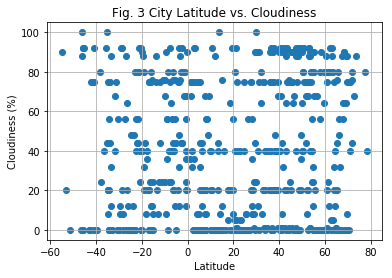

In [60]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Fig. 3 City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

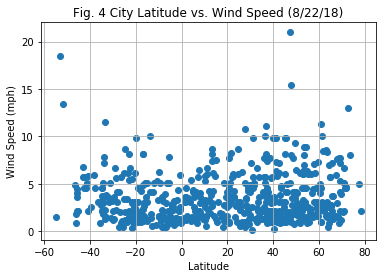

In [59]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Fig. 4 City Latitude vs. Wind Speed (8/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_Wind_speed.png")

# Show plot
plt.show()

 According to Fig. 1, max temperature (F) rises at a latitude of 0.
 According to Fig. 2, latitude has no effect on humidity.
 According to Fig. 3, latitude has no effect on cloudiness.
 According to Fig. 4, latitude has no effect on wind speed.